Author: **Ermishin Andrei**

Course: mlcourse.ai

# Predict the popularity of article

In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
# To have bigger plot sizes and use sns output in pandas plot-commands.
sns.set(rc={'figure.figsize': (9, 6)})

## Look at the data

In [14]:
train_df = pd.read_csv('howpop_train.csv')
print(train_df.shape)
train_df.head(3)

(134137, 17)


,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656


In [15]:
test_df = pd.read_csv('howpop_test.csv')
print(test_df.shape)
test_df.head(3)

(3990, 9)


,url,domain,post_id,published,author,flow,polling,content_len,title
0,https://habrahabr.ru/post/314080/,habrahabr.ru,314080,2016-11-01 01:05:00,@fsou11,develop,True,20132,Опыт использования MassTransit 3.0
1,https://habrahabr.ru/company/plesk/blog/313732/,habrahabr.ru,313732,2016-11-01 05:42:00,NaN,marketing,False,12389,Геймификация форума на движке XenForo
2,https://habrahabr.ru/company/etagi/blog/314000/,habrahabr.ru,314000,2016-11-01 08:33:00,NaN,admin,False,72839,Кластер высокой доступности на postgresql 9.6 ...


In [16]:
train_df[train_df.columns[:-3]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [17]:
train_df.describe(include=['object', 'bool']).transpose()

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/140357/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [18]:
print(train_df['published'].dtype)
train_df['published'] = pd.to_datetime(train_df['published'], yearfirst=True)
test_df['published'] = pd.to_datetime(test_df['published'], yearfirst=True)

print(train_df['published'].dtype)

object
datetime64[ns]


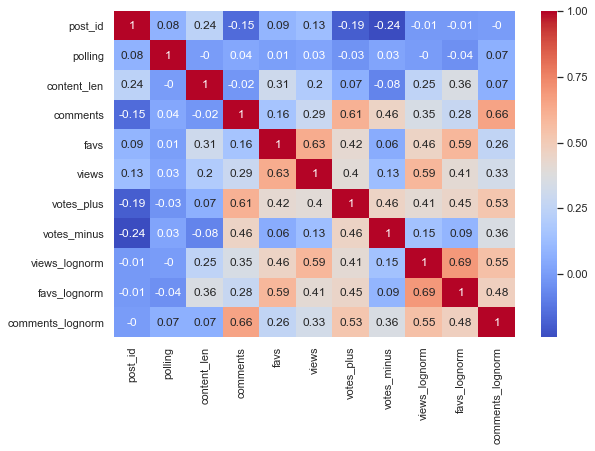

In [21]:
sns.heatmap(train_df.corr().round(2), annot=True, cmap='coolwarm')

In [22]:
# January=1, December=12, Monday=0, Sunday=6
train_df = train_df.assign(year=train_df['published'].dt.year,
                           month=train_df['published'].dt.month,
                           dayname=train_df['published'].dt.day_name(),
                           hour=train_df['published'].dt.hour)
train_df.head(3)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,...,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm,year,month,dayname,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,...,236,0.0,0.0,-0.792687,-1.344075,-2.436871,2008,1,Tuesday,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,...,353,1.0,0.0,-0.485214,-0.831946,-1.873193,2008,1,Tuesday,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,...,1200,45.0,5.0,0.446090,1.794023,0.574656,2008,1,Tuesday,18


In [23]:
# January=1, December=12, Monday=0, Sunday=6
test_df = test_df.assign(year=test_df['published'].dt.year,
                         month=test_df['published'].dt.month,
                         dayname=test_df['published'].dt.day_name(),
                         hour=test_df['published'].dt.hour)
test_df.head(3)

,url,domain,post_id,published,author,flow,polling,content_len,title,year,month,dayname,hour
0,https://habrahabr.ru/post/314080/,habrahabr.ru,314080,2016-11-01 01:05:00,@fsou11,develop,True,20132,Опыт использования MassTransit 3.0,2016,11,Tuesday,1
1,https://habrahabr.ru/company/plesk/blog/313732/,habrahabr.ru,313732,2016-11-01 05:42:00,NaN,marketing,False,12389,Геймификация форума на движке XenForo,2016,11,Tuesday,5
2,https://habrahabr.ru/company/etagi/blog/314000/,habrahabr.ru,314000,2016-11-01 08:33:00,NaN,admin,False,72839,Кластер высокой доступности на postgresql 9.6 ...,2016,11,Tuesday,8


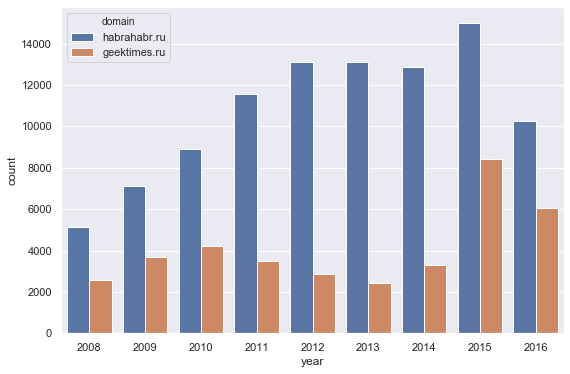

In [24]:
# train_df['published'].apply(lambda ts: pd.to_datetime(ts).year).value_counts()
sns.countplot(x='year', hue='domain', data=train_df)

Most of articles were published in 2015.

In [25]:
features = ['author', 'flow', 'domain', 'title']

In [69]:
from sklearn.model_selection import train_test_split

X = train_df[features]
y = train_df['favs_lognorm']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3,
                                                      random_state=11)
X_test = test_df[features]
print(X_train.shape, X_test.shape)
X_train.head(2)

(93895, 4) (3990, 4)


,author,flow,domain,title
81054,@fingoldo,develop,habrahabr.ru,Быстрая генерация массивов случайных чисел для...
8081,NaN,misc,habrahabr.ru,Opera следит за тобой!


## Use TfidfVectorizer for text-like features

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.3, min_df=3, ngram_range=(1, 3))

X_train_title = tfidf.fit_transform(X_train['title'])
X_valid_title = tfidf.transform(X_valid['title'])
X_test_title = tfidf.transform(X_test['title'])

print(len(tfidf.vocabulary_))
print([(word, index) for word, index in tfidf.vocabulary_.items()][:5])
print('feature index for "python":', tfidf.vocabulary_['python'])

52721
[('быстрая', 14443), ('генерация', 17186), ('массивов', 28045), ('случайных', 45181), ('чисел', 51359)]
feature index for "python": 8760


In [71]:
tfidf_char = TfidfVectorizer(analyzer='char')

X_train_title_char = tfidf_char.fit_transform(X_train['title'])
X_valid_title_char = tfidf_char.transform(X_valid['title'])
X_test_title_char = tfidf_char.transform(X_test['title'])

print(len(tfidf_char.vocabulary_))
print([(chars, index) for chars, index in tfidf_char.vocabulary_.items()][:5])

220
[('б', 121), ('ы', 147), ('с', 137), ('т', 138), ('р', 136)]


## Use DictVectorizer for categorical features

In [72]:
cat_features = features[:-1]
cat_features

['author', 'flow', 'domain']

In [73]:
X_train[cat_features].isna().sum()

author    25570
flow      26098
domain        0
dtype: int64

In [74]:
from sklearn.feature_extraction import DictVectorizer

dict_vect = DictVectorizer()

X_train_cat = dict_vect.fit_transform(X_train[cat_features].fillna('nan').to_dict('records'))
X_valid_cat = dict_vect.transform(X_valid[cat_features].fillna('nan').to_dict('records'))
X_test_cat = dict_vect.transform(X_test[cat_features].fillna('nan').to_dict('records'))

# print(dict_vect.vocabulary_)
# {'author=@fingoldo': 10588, 'flow=develop': 18391, 'domain=habrahabr.ru': 18388, 'author=nan': 18386, ...
print(X_train_cat.shape)
dict_vect.feature_names_[:3]

(93895, 18396)


['author=@0000168', 'author=@01000110110010010010', 'author=@029ah']

In [76]:
from scipy.sparse import hstack

X_train = hstack([X_train_title, X_train_cat, X_train_title_char])
X_valid = hstack([X_valid_title, X_valid_cat, X_valid_title_char])
X_test = hstack([X_test_title, X_test_cat, X_test_title_char])
X_train.shape, X_valid.shape, X_test.shape

((93895, 71337), (40242, 71337), (3990, 71337))

## Train a model

In [77]:
from sklearn.linear_model import Ridge

In [78]:
%%time
clf_1 = Ridge(alpha=0.1, random_state=11)
clf_1.fit(X_train, y_train)

Wall time: 3.99 s


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=11, solver='auto', tol=0.001)

In [79]:
from sklearn.metrics import mean_squared_error

train_pred1 = clf_1.predict(X_train)
valid_pred1 = clf_1.predict(X_valid)

mean_squared_error(y_train, train_pred1), mean_squared_error(y_valid, valid_pred1)

(0.16766189765813203, 0.8033224130901161)

Larger values of `alpha` specify stronger regularization, so if we increase value of `alpha`...

In [80]:
%%time
clf_2 = Ridge(alpha=1.0, random_state=11)
clf_2.fit(X_train, y_train)

Wall time: 1.98 s


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=11, solver='auto', tol=0.001)

In [81]:
train_pred2 = clf_2.predict(X_train)
valid_pred2 = clf_2.predict(X_valid)

mean_squared_error(y_train, train_pred2), mean_squared_error(y_valid, valid_pred2)

(0.2726990581451179, 0.5921465757695888)

... then we get lower error on validation data and slightly bigger on training data.

## Train a default model on full data

In [82]:
from scipy.sparse import vstack

X_train_full = vstack([X_train, X_valid])
X_train_full.shape, X_test.shape

((134137, 71337), (3990, 71337))

In [107]:
y_train_full = pd.concat([y_train, y_valid])
y_train_full.shape

(134137,)

In [140]:
%%time
ridge_def = Ridge(random_state=11)
ridge_def.fit(X_train_full, y_train_full)

mean_squared_error(y_train_full, ridge_def.predict(X_train_full))

Wall time: 3 s


0.31567403995762017

In [141]:
test_pred = ridge_def.predict(X_test)
test_pred[:5]

array([ 0.10040776, -1.15727523,  0.4305654 ,  0.60813918,  1.08104025])

## Default submission

In [111]:
example = pd.read_csv('howpop_submission_example.csv')
print(example.shape)
example.head(3)

(3990, 2)


,url,favs_lognorm
0,https://habrahabr.ru/post/314080/,0.323588
1,https://habrahabr.ru/company/plesk/blog/313732/,0.560105
2,https://habrahabr.ru/company/etagi/blog/314000/,0.667039


In [113]:
output = pd.DataFrame({'url': test_df['url'],
                      'favs_lognorm': test_pred})
output.to_csv('howpop_submission_def.csv', index=False)

## New submission

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_clen = scaler.fit_transform(train_df[['content_len']])
X_test_clen = scaler.transform(test_df[['content_len']])

In [137]:
day_hour_vect = DictVectorizer()

train_df['hour_str'] = train_df['hour'].astype('str')
test_df['hour_str'] = test_df['hour'].astype('str')

X_train_day_hour = day_hour_vect.fit_transform(train_df[['dayname', 'hour_str']].to_dict('records'))
X_test_day_hour = day_hour_vect.transform(test_df[['dayname', 'hour_str']].to_dict('records'))

print(day_hour_vect.feature_names_)
X_train_day_hour.shape, X_test_day_hour.shape

['dayname=Friday', 'dayname=Monday', 'dayname=Saturday', 'dayname=Sunday', 'dayname=Thursday', 'dayname=Tuesday', 'dayname=Wednesday', 'hour_str=0', 'hour_str=1', 'hour_str=10', 'hour_str=11', 'hour_str=12', 'hour_str=13', 'hour_str=14', 'hour_str=15', 'hour_str=16', 'hour_str=17', 'hour_str=18', 'hour_str=19', 'hour_str=2', 'hour_str=20', 'hour_str=21', 'hour_str=22', 'hour_str=23', 'hour_str=3', 'hour_str=4', 'hour_str=5', 'hour_str=6', 'hour_str=7', 'hour_str=8', 'hour_str=9']


((134137, 31), (3990, 31))

In [138]:
X_train_new = hstack([X_train_full, X_train_clen, X_train_day_hour])
X_test_new = hstack([X_test, X_test_clen, X_test_day_hour])
X_train_new.shape, X_test_new.shape

((134137, 71369), (3990, 71369))

In [143]:
%%time
from sklearn.model_selection import GridSearchCV

lin_ridge = Ridge(random_state=11)

params = {'alpha': np.power(10.0, np.arange(-5, 6))}

search = GridSearchCV(lin_ridge, param_grid=params, cv=5,
                      scoring='neg_mean_squared_error', n_jobs=-1)
search.fit(X_train_new, y_train_full)
search.best_score_, search.best_params_

Wall time: 2min 35s


(-0.587487118543143, {'alpha': 1.0})

In [144]:
output = pd.DataFrame({'url': test_df['url'],
                      'favs_lognorm': search.predict(X_test_new)})
output.to_csv('howpop_submission_new.csv', index=False)